# 데이터 나누기

In [2]:
#한글을 읽는 코드드
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


In [3]:
import pandas as pd

In [4]:
# CSV 파일을 읽어옵니다.
df = pd.read_csv('../제주 기상관측 및 풍력 발전 현황_20241224_Final.csv')

# 'datetime' 열을 datetime 형식으로 변환합니다.
df['Date'] = pd.to_datetime(df['Date'])

# 2023년 데이터를 검증셋으로 만듭니다.
validation_set = df[df['Date'].dt.year == 2023]

# 나머지 데이터를 테스트셋으로 만듭니다.
test_set = df[df['Date'] != 2023]

# 검증셋과 테스트셋을 출력합니다.
print("Validation Set:")
print(validation_set)
print("\nTest Set:")
print(test_set)

# 검증셋과 테스트셋을 CSV 파일로 저장합니다.
validation_set.to_csv('validation_set.csv', index=False)
test_set.to_csv('test_set.csv', index=False)

Validation Set:
                     Date  Temp  Rainfall  Humidity  Total_Cloud_Cover  \
26304 2023-01-01 00:00:00   0.5       NaN      82.0                3.0   
26305 2023-01-01 01:00:00   1.2       NaN      79.0                5.0   
26306 2023-01-01 02:00:00   1.7       NaN      76.0                6.0   
26307 2023-01-01 03:00:00   3.0       NaN      72.0                7.0   
26308 2023-01-01 04:00:00  -0.1       NaN      83.0                7.0   
...                   ...   ...       ...       ...                ...   
35059 2023-12-31 19:00:00   8.0       NaN      63.0                8.0   
35060 2023-12-31 20:00:00   8.0       NaN      63.0                8.0   
35061 2023-12-31 21:00:00   7.5       NaN      63.0                8.0   
35062 2023-12-31 22:00:00   7.4       NaN      62.0                8.0   
35063 2023-12-31 23:00:00   7.6       NaN      62.0                7.0   

       Average_Wind_Speed  Average_Gust_Speed  Wind_Power_Capacity  \
26304                 1.3

In [5]:
df = test_set
df_vd = validation_set

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   35064 non-null  datetime64[ns]
 1   Temp                   35061 non-null  float64       
 2   Rainfall               3394 non-null   float64       
 3   Humidity               35062 non-null  float64       
 4   Total_Cloud_Cover      34753 non-null  float64       
 5   Average_Wind_Speed     34876 non-null  float64       
 6   Average_Gust_Speed     34876 non-null  float64       
 7   Wind_Power_Capacity    0 non-null      float64       
 8   Wind_Power_Generation  35064 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 2.4 MB


# 데이터 전처리

In [7]:
df.head()

,Date,Temp,Rainfall,Humidity,Total_Cloud_Cover,Average_Wind_Speed,Average_Gust_Speed,Wind_Power_Capacity,Wind_Power_Generation
0,2020-01-01 00:00:00,0.9,NaN,67.0,8.0,2.2,270.0,NaN,147.164
1,2020-01-01 01:00:00,0.9,NaN,67.0,8.0,2.4,270.0,NaN,114.776
2,2020-01-01 02:00:00,1.3,NaN,68.0,9.0,1.7,290.0,NaN,108.452
3,2020-01-01 03:00:00,1.4,NaN,67.0,9.0,2.2,320.0,NaN,128.533
4,2020-01-01 04:00:00,1.6,NaN,68.0,9.0,1.7,270.0,NaN,114.624


In [8]:
df.isna().sum()

Date                         0
Temp                         3
Rainfall                 31670
Humidity                     2
Total_Cloud_Cover          311
Average_Wind_Speed         188
Average_Gust_Speed         188
Wind_Power_Capacity      35064
Wind_Power_Generation        0
dtype: int64

In [9]:
# 각 열의 결측치를 0으로 채웁니다.
df['Rainfall'] = df['Rainfall'].fillna(0)
df['Average_Gust_Speed'] = df['Average_Gust_Speed'].fillna(0)
df['Average_Wind_Speed'] = df['Average_Wind_Speed'].fillna(0)
df.drop(['Wind_Power_Capacity'],axis=1,inplace=True)
df = df.dropna()


In [10]:
import pandas as pd
import numpy as np
df['Average_Gust_Speed'] = df['Average_Gust_Speed'].astype(float)
df['Average_Gust_Speed'] = pd.to_numeric(df['Average_Gust_Speed'], errors='coerce')
""""
# 방향 구분 함수
def get_direction(angle):
    if (angle >= 337.5) or (angle < 22.5):
        return 'N'  # 북
    elif 22.5 <= angle < 67.5:
        return 'NE'  # 북동
    elif 67.5 <= angle < 112.5:
        return 'E'  # 동
    elif 112.5 <= angle < 157.5:
        return 'SE'  # 남동
    elif 157.5 <= angle < 202.5:
        return 'S'  # 남
    elif 202.5 <= angle < 247.5:
        return 'SW'  # 남서
    elif 247.5 <= angle < 292.5:
        return 'W'  # 서
    elif 292.5 <= angle < 337.5:
        return 'NW'  # 북서

# 8방향 변환
df['Average_Gust_Speed'] = df['Average_Gust_Speed'].apply(get_direction)
#df = pd.get_dummies(df, columns=['Average_Gust_Speed'])
"""
print(df)

                     Date  Temp  Rainfall  Humidity  Total_Cloud_Cover  \
0     2020-01-01 00:00:00   0.9       0.0      67.0                8.0   
1     2020-01-01 01:00:00   0.9       0.0      67.0                8.0   
2     2020-01-01 02:00:00   1.3       0.0      68.0                9.0   
3     2020-01-01 03:00:00   1.4       0.0      67.0                9.0   
4     2020-01-01 04:00:00   1.6       0.0      68.0                9.0   
...                   ...   ...       ...       ...                ...   
35059 2023-12-31 19:00:00   8.0       0.0      63.0                8.0   
35060 2023-12-31 20:00:00   8.0       0.0      63.0                8.0   
35061 2023-12-31 21:00:00   7.5       0.0      63.0                8.0   
35062 2023-12-31 22:00:00   7.4       0.0      62.0                8.0   
35063 2023-12-31 23:00:00   7.6       0.0      62.0                7.0   

       Average_Wind_Speed  Average_Gust_Speed  Wind_Power_Generation  
0                     2.2               

C:\Users\thsbd\AppData\Local\Temp\ipykernel_11244\4087085495.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Average_Gust_Speed'] = df['Average_Gust_Speed'].astype(float)
C:\Users\thsbd\AppData\Local\Temp\ipykernel_11244\4087085495.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Average_Gust_Speed'] = pd.to_numeric(df['Average_Gust_Speed'], errors='coerce')


In [11]:
df.isna().sum()

Date                     0
Temp                     0
Rainfall                 0
Humidity                 0
Total_Cloud_Cover        0
Average_Wind_Speed       0
Average_Gust_Speed       0
Wind_Power_Generation    0
dtype: int64

In [12]:
# 계절 정보를 추가
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'  
    elif month in [6, 7, 8]:
        return 'Summer'  
    elif month in [9, 10, 11]:
        return 'Autumn'  
    else:
        return 'Winter'  

# 계절 컬럼 생성
df['season'] = df['Date'].dt.month.apply(get_season)

# 계절을 숫자형으로 변환
season_mapping = {'Spring': 1, 'Summer': 2, 'Autumn': 3, 'Winter': 4}
df['season_numeric'] = df['season'].map(season_mapping)


C:\Users\thsbd\AppData\Local\Temp\ipykernel_11244\540638019.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['season'] = df['Date'].dt.month.apply(get_season)
C:\Users\thsbd\AppData\Local\Temp\ipykernel_11244\540638019.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['season_numeric'] = df['season'].map(season_mapping)


In [13]:
df['month'] = df['Date'].dt.month

# 상관관계 분석에 필요한 열을 숫자로 변환
df[['Total_Cloud_Cover', 'Average_Wind_Speed', 'Wind_Power_Generation']] = df[['Total_Cloud_Cover', 'Average_Wind_Speed', 'Wind_Power_Generation']].apply(pd.to_numeric, errors='coerce')

# 결측값 제거w
df_corr = df[['Total_Cloud_Cover', 'Average_Wind_Speed', 'Wind_Power_Generation']].dropna()

# 상관관계 계산
correlation = df_corr.corr()

print(correlation)

                       Total_Cloud_Cover  Average_Wind_Speed  \
Total_Cloud_Cover               1.000000            0.082725   
Average_Wind_Speed              0.082725            1.000000   
Wind_Power_Generation           0.176080            0.511805   

                       Wind_Power_Generation  
Total_Cloud_Cover                   0.176080  
Average_Wind_Speed                  0.511805  
Wind_Power_Generation               1.000000  


C:\Users\thsbd\AppData\Local\Temp\ipykernel_11244\319897185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['Date'].dt.month
C:\Users\thsbd\AppData\Local\Temp\ipykernel_11244\319897185.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Total_Cloud_Cover', 'Average_Wind_Speed', 'Wind_Power_Generation']] = df[['Total_Cloud_Cover', 'Average_Wind_Speed', 'Wind_Power_Generation']].apply(pd.to_numeric, errors='coerce')


In [14]:
df

,Date,Temp,Rainfall,Humidity,Total_Cloud_Cover,Average_Wind_Speed,Average_Gust_Speed,Wind_Power_Generation,season,season_numeric,month
0,2020-01-01 00:00:00,0.9,0.0,67.0,8.0,2.2,270.0,147.164,Winter,4,1
1,2020-01-01 01:00:00,0.9,0.0,67.0,8.0,2.4,270.0,114.776,Winter,4,1
2,2020-01-01 02:00:00,1.3,0.0,68.0,9.0,1.7,290.0,108.452,Winter,4,1
3,2020-01-01 03:00:00,1.4,0.0,67.0,9.0,2.2,320.0,128.533,Winter,4,1
4,2020-01-01 04:00:00,1.6,0.0,68.0,9.0,1.7,270.0,114.624,Winter,4,1
...,...,...,...,...,...,...,...,...,...,...,...
35059,2023-12-31 19:00:00,8.0,0.0,63.0,8.0,3.0,160.0,157.157,Winter,4,12
35060,2023-12-31 20:00:00,8.0,0.0,63.0,8.0,2.5,180.0,162.586,Winter,4,12
35061,2023-12-31 21:00:00,7.5,0.0,63.0,8.0,5.9,110.0,184.700,Winter,4,12
35062,2023-12-31 22:00:00,7.4,0.0,62.0,8.0,2.3,230.0,134.427,Winter,4,12


# 검증셋 전처리

In [13]:
df_vd.head

<bound method NDFrame.head of                      Date  Temp  Rainfall  Humidity  Total_Cloud_Cover  \
26304 2023-01-01 00:00:00   0.5       NaN      82.0                3.0   
26305 2023-01-01 01:00:00   1.2       NaN      79.0                5.0   
26306 2023-01-01 02:00:00   1.7       NaN      76.0                6.0   
26307 2023-01-01 03:00:00   3.0       NaN      72.0                7.0   
26308 2023-01-01 04:00:00  -0.1       NaN      83.0                7.0   
...                   ...   ...       ...       ...                ...   
35059 2023-12-31 19:00:00   8.0       NaN      63.0                8.0   
35060 2023-12-31 20:00:00   8.0       NaN      63.0                8.0   
35061 2023-12-31 21:00:00   7.5       NaN      63.0                8.0   
35062 2023-12-31 22:00:00   7.4       NaN      62.0                8.0   
35063 2023-12-31 23:00:00   7.6       NaN      62.0                7.0   

       Average_Wind_Speed  Average_Gust_Speed  Wind_Power_Capacity  \
26304      

In [14]:
df_vd.isna().sum()

Date                        0
Temp                        0
Rainfall                 7815
Humidity                    0
Total_Cloud_Cover           4
Average_Wind_Speed          1
Average_Gust_Speed          1
Wind_Power_Capacity      8760
Wind_Power_Generation       0
dtype: int64

In [15]:
# 각 열의 결측치를 0으로 채웁니다.
df_vd['Rainfall'] = df_vd['Rainfall'].fillna(0)
df_vd['Average_Gust_Speed'] = df_vd['Average_Gust_Speed'].fillna(0)
df_vd['Average_Wind_Speed'] = df_vd['Average_Wind_Speed'].fillna(0)
df_vd.drop(['Wind_Power_Capacity'],axis=1,inplace=True)
df_vd = df_vd.dropna()


In [16]:
# 계절 정보를 추가
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'  # 봄
    elif month in [6, 7, 8]:
        return 'Summer'  # 여름
    elif month in [9, 10, 11]:
        return 'Autumn'  # 가을
    else:
        return 'Winter'  # 겨울

# 계절 컬럼 생성
df_vd['season'] = df_vd['Date'].dt.month.apply(get_season)

# 계절을 숫자형으로 변환 (모델 입력용)
season_mapping = {'Spring': 1, 'Summer': 2, 'Autumn': 3, 'Winter': 4}
df_vd['season_numeric'] = df_vd['season'].map(season_mapping)


C:\Users\thsbd\AppData\Local\Temp\ipykernel_25696\39981078.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vd['season'] = df_vd['Date'].dt.month.apply(get_season)
C:\Users\thsbd\AppData\Local\Temp\ipykernel_25696\39981078.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vd['season_numeric'] = df_vd['season'].map(season_mapping)


In [17]:
df_vd['month'] = df_vd['Date'].dt.month

# 상관관계 분석에 필요한 열을 숫자로 변환
df_vd[['Total_Cloud_Cover', 'Average_Wind_Speed', 'Wind_Power_Generation']] = df_vd[['Total_Cloud_Cover', 'Average_Wind_Speed', 'Wind_Power_Generation']].apply(pd.to_numeric, errors='coerce')

# 결측값 제거w
df_vd_corr = df_vd[['Total_Cloud_Cover', 'Average_Wind_Speed', 'Wind_Power_Generation']].dropna()

# 상관관계 계산
correlations = df_vd_corr.corr()

print(correlations)

C:\Users\thsbd\AppData\Local\Temp\ipykernel_25696\2885103459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vd['month'] = df_vd['Date'].dt.month


                       Total_Cloud_Cover  Average_Wind_Speed  \
Total_Cloud_Cover               1.000000            0.091905   
Average_Wind_Speed              0.091905            1.000000   
Wind_Power_Generation           0.196186            0.532597   

                       Wind_Power_Generation  
Total_Cloud_Cover                   0.196186  
Average_Wind_Speed                  0.532597  
Wind_Power_Generation               1.000000  


C:\Users\thsbd\AppData\Local\Temp\ipykernel_25696\2885103459.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vd[['Total_Cloud_Cover', 'Average_Wind_Speed', 'Wind_Power_Generation']] = df_vd[['Total_Cloud_Cover', 'Average_Wind_Speed', 'Wind_Power_Generation']].apply(pd.to_numeric, errors='coerce')


In [18]:
df_vd

,Date,Temp,Rainfall,Humidity,Total_Cloud_Cover,Average_Wind_Speed,Average_Gust_Speed,Wind_Power_Generation,season,season_numeric,month
26304,2023-01-01 00:00:00,0.5,0.0,82.0,3.0,1.3,290.0,79.524,Winter,4,1
26305,2023-01-01 01:00:00,1.2,0.0,79.0,5.0,1.6,270.0,82.397,Winter,4,1
26306,2023-01-01 02:00:00,1.7,0.0,76.0,6.0,1.2,250.0,59.590,Winter,4,1
26307,2023-01-01 03:00:00,3.0,0.0,72.0,7.0,2.7,290.0,69.966,Winter,4,1
26308,2023-01-01 04:00:00,-0.1,0.0,83.0,7.0,1.0,20.0,77.687,Winter,4,1
...,...,...,...,...,...,...,...,...,...,...,...
35059,2023-12-31 19:00:00,8.0,0.0,63.0,8.0,3.0,160.0,157.157,Winter,4,12
35060,2023-12-31 20:00:00,8.0,0.0,63.0,8.0,2.5,180.0,162.586,Winter,4,12
35061,2023-12-31 21:00:00,7.5,0.0,63.0,8.0,5.9,110.0,184.700,Winter,4,12
35062,2023-12-31 22:00:00,7.4,0.0,62.0,8.0,2.3,230.0,134.427,Winter,4,12


In [19]:
df.value_counts('Average_Gust_Speed')

Average_Gust_Speed
320.0    4075
290.0    3201
230.0    2906
50.0     2593
200.0    2485
270.0    2361
70.0     2314
340.0    2115
250.0    2078
180.0    1738
90.0     1404
160.0    1404
360.0    1387
20.0     1332
110.0    1274
140.0    1137
0.0       946
Name: count, dtype: int64

# '풍력발전 예측 | LSTM 사용 | MinMaxScaler 사용\nlearning_rate=0.001 | 윈도우=168 | epochs=50

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
# 데이터 준비
X = df[['Average_Wind_Speed', 'season_numeric', 'Temp']].dropna()
y = df.loc[X.index, 'Wind_Power_Generation']

# 데이터 정규화
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# 시계열 데이터 창 생성 함수
def create_sequences(X, y, window_size):
    X_seq, y_seq = [], []
    for i in range(len(X) - window_size):
        X_seq.append(X[i:i + window_size])
        y_seq.append(y[i + window_size])
    return np.array(X_seq), np.array(y_seq)

# 시계열 창 크기 설정
window_size = 168  
X_seq, y_seq = create_sequences(X_scaled, y_scaled, window_size)

# 데이터 분리
split_index = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:split_index], X_seq[split_index:]
y_train, y_test = y_seq[:split_index], y_seq[split_index:]

# LSTM 모델 정의
model = Sequential([
    LSTM(50, activation='relu', return_sequences=False, input_shape=(window_size, X_train.shape[2])),
    Dropout(0.2),
    Dense(1)
])

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')


# 모델 학습
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# 예측
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test)

# 평가
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
r2 = r2_score(y_test_actual, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")


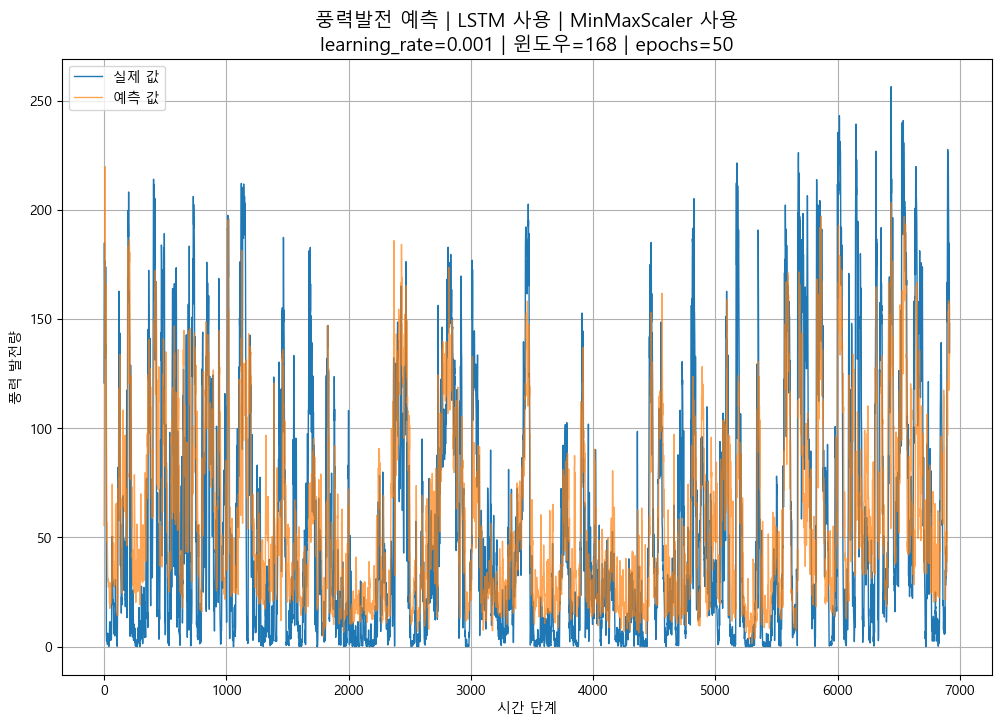

<Figure size 640x480 with 0 Axes>

In [53]:
import matplotlib.pyplot as plt

# 시각화 코드
plt.figure(figsize=(12, 8))
plt.plot(y_test_actual, label='실제 값', linewidth=1)
plt.plot(y_pred, label='예측 값', linewidth=1, alpha=0.7)
plt.title('풍력발전 예측 | LSTM 사용 | MinMaxScaler 사용\nlearning_rate=0.001 | 윈도우=168 | epochs=50', fontsize=14)
plt.xlabel('시간 단계')
plt.ylabel('풍력 발전량')
plt.legend()
plt.grid()
plt.show()
plt.savefig('풍력발전량 예측_7일일.png')

# 풍력발전_예측 | LSTM 사용 | MinMaxScaler 사용\nlearning_rate=0.001 | 윈도우=24 | epochs=50'

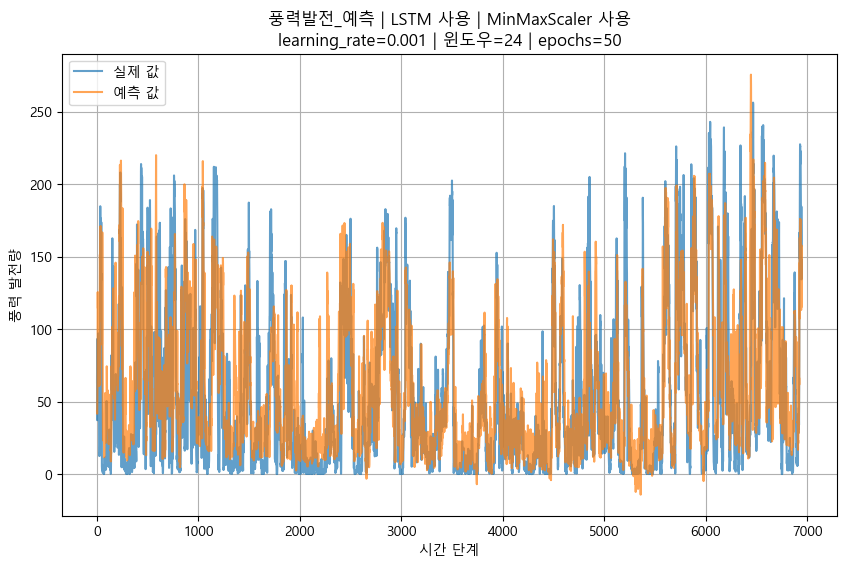

<Figure size 640x480 with 0 Axes>

In [83]:
import matplotlib.pyplot as plt

# 제목 구성
title = '풍력발전_예측 | LSTM 사용 | MinMaxScaler 사용\nlearning_rate=0.001 | 윈도우=24 | epochs=50'

# 플롯 생성
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual.flatten(), label='실제 값', alpha=0.7)
plt.plot(y_pred.flatten(), label='예측 값', alpha=0.7)
plt.title(title, fontsize=12)  # 제목 추가
plt.xlabel('시간 단계')
plt.ylabel('풍력 발전량')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('풍력발전_예측.png')

# 풍력만넣었을때
# 풍력발전_예측 | LSTM 사용 | MinMaxScaler 사용\nlearning_rate=0.001 | 윈도우=24 | epochs=50'

In [56]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
# 데이터 준비
X = df[['Average_Wind_Speed']].dropna()
y = df.loc[X.index, 'Wind_Power_Generation']

# 데이터 정규화
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# 시계열 데이터 창 생성 함수
def create_sequences(X, y, window_size):
    X_seq, y_seq = [], []
    for i in range(len(X) - window_size):
        X_seq.append(X[i:i + window_size])
        y_seq.append(y[i + window_size])
    return np.array(X_seq), np.array(y_seq)

# 시계열 창 크기 설정
window_size = 24
X_seq, y_seq = create_sequences(X_scaled, y_scaled, window_size)

# 데이터 분리
split_index = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:split_index], X_seq[split_index:]
y_train, y_test = y_seq[:split_index], y_seq[split_index:]

# LSTM 모델 정의
model = Sequential([
    LSTM(50, activation='relu', return_sequences=False, input_shape=(window_size, X_train.shape[2])),
    Dropout(0.2),
    Dense(1)
])

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')


# 모델 학습
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# 예측
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test)

# 평가
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
r2 = r2_score(y_test_actual, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")


Epoch 1/50


C:\Users\thsbd\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


869/869 - 15s - 17ms/step - loss: 0.0425 - val_loss: 0.0335
Epoch 2/50
869/869 - 11s - 12ms/step - loss: 0.0385 - val_loss: 0.0325
Epoch 3/50
869/869 - 11s - 13ms/step - loss: 0.0380 - val_loss: 0.0336
Epoch 4/50
869/869 - 11s - 12ms/step - loss: 0.0378 - val_loss: 0.0346
Epoch 5/50
869/869 - 11s - 13ms/step - loss: 0.0377 - val_loss: 0.0329
Epoch 6/50
869/869 - 12s - 14ms/step - loss: 0.0374 - val_loss: 0.0329
Epoch 7/50
869/869 - 10s - 12ms/step - loss: 0.0373 - val_loss: 0.0332
Epoch 8/50
869/869 - 12s - 14ms/step - loss: 0.0373 - val_loss: 0.0320
Epoch 9/50
869/869 - 14s - 17ms/step - loss: 0.0370 - val_loss: 0.0319
Epoch 10/50
869/869 - 14s - 16ms/step - loss: 0.0367 - val_loss: 0.0334
Epoch 11/50
869/869 - 13s - 15ms/step - loss: 0.0363 - val_loss: 0.0325
Epoch 12/50
869/869 - 10s - 12ms/step - loss: 0.0362 - val_loss: 0.0312
Epoch 13/50
869/869 - 11s - 12ms/step - loss: 0.0358 - val_loss: 0.0325
Epoch 14/50
869/869 - 10s - 12ms/step - loss: 0.0356 - val_loss: 0.0314
Epoch 15/50
